<a href="https://colab.research.google.com/github/codestates/ds-section4-sprint3/blob/master/N433/n433-autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 3 / NOTE 3*

--- 
# N433. Autoencoders (AE)

## Review
 - [ ] CNN을 사용했을 때, ANN과 비교하여 특징 및 장점을 설명할 수 있다.
 - [ ] RNN을 왜 사용하는 지 알고 있다.
 - [ ] RNN 대신 LSTM을 왜 사용하는 지 알고 있다.
 - [ ] GRU는 LSTM과 무엇이 다른 지 설명할 수 있다. 
 - [ ] Transformer는 CNN과 RNN과 무엇이 다른 지 설명할 수 있다.
 - [ ] Transfer Learning의 개념을 이해하고 있고, 어떻게 활용할 수 있는 지 알고 있다. 
 - [ ] Transfer Learning할 때 레이어별 weight의 학습여부를 선택한다는 것이 무슨 의미인지 이해한다.
 - [ ] Segmentation의 개념을 설명할 수 있다. 
 - [ ] Data augmentation을 활용할 수 있다.
 - [ ] Object Recognition의 동작 원리를 이해하고 있다. 

## WarmUp
- [AE 소개영상 1](https://youtu.be/YxtzQbe2UaE)
- [AE 소개영상 2](https://youtu.be/54hyK1J4wTc?t=889)
- [AE 소개영상 3(영어)](https://youtu.be/3jmcHZq3A5s?t=93)

  오토인코더(Autoencoders)는 비지도학습 방식으로 효율적인 데이터 코딩(encoding, decoding)을 학습하는 데 사용되는 인공 신경망의 한 유형입니다. 오토 인코더의 목적은 네트워크가 신호 "노이즈"를 무시하도록 훈련함으로써 일반적으로 차원 감소를 위한 데이터세트에 대한 잠재적 표현(Latent representation)을 학습하는 것입니다. 데이터 차원의 축소(encoding)와 축소된 데이터에서 다시 재구성(decoding)하는 가중치들이 학습됩니다. 그리고 이 각 과정은 인코딩 모델과 디코딩 모델로 나눌 수 있습니다. 오토인코더를 이용하면, 실습에서 다루겠지만, 노이즈를 제거할 수 있고, 노이즈가 제거된 데이터의 특징값을 추출하는 특성값 추출기(Feature extractor)로 사용할 수도 있습니다. 

## Learning Objectives
*이번 강의가 끝난 뒤에는*:
* <a href="#p1">Part 1</a>: 오토인코더의 구성에 대해서 설명할 수 있어야 합니다. 
* <a href="#p2">Part 2</a>: 오토인코더의 학습 방식에 대해서 이해하고, 
* <a href="#p3">Part 3</a>: 이를 활용하여 기본적인 information retrieval problem를 해결해본다.

__Problem:__ label이 없이도 이미지를 일정 크기의 벡터로 자동 표현할 수 있을까?

__Solution:__ Use an autoencoder

그러면 왜 고정된 크기의 벡터로 표현해야 할까요?

* __Information Retrieval__
    - [Reverse Image Search](https://en.wikipedia.org/wiki/Reverse_image_search)
    - [Recommendation Systems - Content Based Filtering](https://en.wikipedia.org/wiki/Recommender_system#Content-based_filtering)
* __Dimensionality Reduction__
    - [Feature Extraction](https://www.kaggle.com/c/vsb-power-line-fault-detection/discussion/78285)
    - [Manifold Learning](https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction) 

자연어처리(NLP)를 공부했던 기간 동안 단어 임베딩 모델링에 대해 이야기했을 때 이미 **representation learning**에 대해서 알게 되었습니다. 오늘 우리는 오토인코더를 사용하여 이미지에서 자연어와 유사한 목표를 달성할 수 있습니다. 오토인코더는 출력을 입력처럼 만들도록 훈련 된 신경망입니다. 비지도학습이라고 얘기하지만, Self-supervised learning과 같이 표현해도 틀리다고 말할 수 없는 그런 방식입니다. 일반적으로 입력과 완벽히 똑같이 출력할 수 없지만, 근사한 수치로 복제됩니다. 생성된 모델은 입력과 출력을 최대한 근사하게 만들기 위한 데이터의 유용한 속성을 우선학습하게 됩니다. 이로인해 현대 생성 모델링 접근 방식에서 중요한 부분이되었습니다. 이후에 GAN에 대해서 배우겠지만, 오토인코더는 일반 신경망(우리가 그간 써왔던 신경망 종류)의 특별한 경우라고 생각하시면 됩니다. 그렇기 때문에 기존에 배운 역전파 및 경사하강법은 여기에도 잘 동작합니다.

## 개요

그림의 Input에서 Code까지 `Encoder`는 입력 데이터를 압축하고 `decoder`는 압축되지 않은 버전의 데이터를 생성하여 가능한 한 정확하게 입력을 재구성합니다.


<img src='https://miro.medium.com/max/1400/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png' width=800/>

학습과정 -> minimizing a loss function: 
$ L(x, g(f(x))) $

- $L$ 은 손실함수, $g(f(x))$와 $x$의 dissimiliarity (예, mean squared error)
- $f$ 는 encoder function
- $g$ 는 decoder function

<br>
<br>

### 어떻게든 학습은 되겠지(?)라는 막연한 생각만 갖고 넘어가실 것 같아서, 오토인코더의 학습되는 과정을 한번 살펴보겠습니다. 
<br>
<br>

<img src="https://science.sciencemag.org/content/313/5786/504/F1.large.jpg"/>

<br><br>
M사의 모식도를 참고하면, 은닉층의 레이어 수를 다음과 같이 설정하면 [784, 100, 50, 10], <br>
학습하는 과정을 모식도로 출력을 해줍니다.

<img src="https://kr.mathworks.com/help/deeplearning/ug/autoencoderdigitsexample_06_ko_KR.png"/>

<img src="https://kr.mathworks.com/help/deeplearning/ug/autoencoderdigitsexample_07_ko_KR.png"/>

<img src="https://kr.mathworks.com/help/deeplearning/ug/autoencoderdigitsexample_08_ko_KR.png"/>

## 실습 1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

### 1. 기본 오토 인코더
<img src="https://www.tensorflow.org/tutorials/generative/images/intro_autoencoder_result.png"/>
이미지를 64 차원 잠재 벡터로 압축하는 가장 간단한 형태의 `encoder`와 잠재 공간에서 원본 이미지를 재구성하는 `decoder`라는 두 개의 Dense 레이어로 구성된 모델입니다. 

모델을 정의하려면 [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models)를 사용하세요.

### 데이터 세트로드
시작하려면 Fashion MNIST dataset을 이용하여 오토인코더를 학습합니다. 

이 데이터 세트의 각 이미지는 28x28 픽셀입니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Code영역의 벡터(= Latent vector)의 수 정의
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
# decoded된 데이터를 output으로 설정함
autoencoder = Autoencoder(latent_dim) 

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

`x_train`을 입력 및 대상으로 사용하여 모델을 훈련시킵니다. 

`encoder`는 데이터 세트를 784(28x28) 차원에서 latent 공간으로 압축하는 방법을 배우고 

`decoder`는 원본 이미지를 재구성하는 방법을 배웁니다.

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0238 - val_loss: 0.0138
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0094 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.008

학습된 모델을 이용하여 테스트 세트의 이미지를 인코딩 및 디코딩하여 모델을 테스트합니다.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

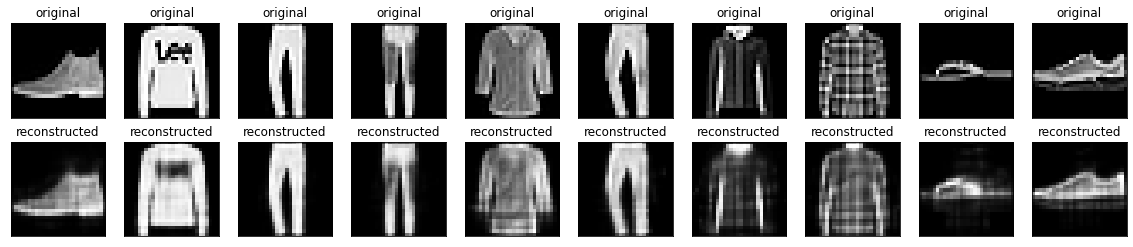

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## 실습 2



### 노이즈 제거용 오토인코더


<img src="https://www.tensorflow.org/tutorials/generative/images/image_denoise_fmnist_results.png" />

오토인코더는 이미지에서 노이즈를 제거하도록 훈련 될 수도 있습니다. 다음 섹션에서는 각 이미지에 임의의 노이즈를 적용하여 Fashion MNIST 데이터 세트의 노이즈 버전을 생성합니다. 그런 다음 잡음이있는 이미지를 입력으로 사용하고 원본 이미지를 대상으로 사용하여 오토 인코더를 훈련합니다.

이전에 수정 한 내용을 생략하기 위해 데이터 세트를 다시 가져 오겠습니다.

In [ ]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


이미지에 random noise 를 만들어 더해줍니다.

In [ ]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

노이즈가 더해진 이미지를 시각화해보면 다음과 같습니다.

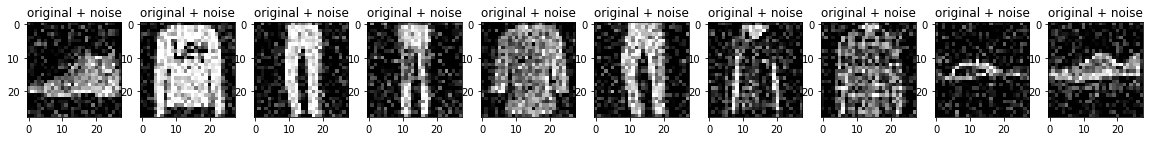

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

### convolutional autoencoder

이번 예제는 같은 원리르 갖지만, 가중치의 형태를 CNN형태로 가져옵니다. 

[Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) 레이어를 `encoder`로 사용하고, 반대로 `decoder`로는 [Conv2DTranspose](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose) 를 사용하는 구조입니다.

In [ ]:
# CNN의 형태를 갖는 autoencoder 코드
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)), 
      layers.Conv2D(16, (3,3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3,3), activation='relu', padding='same', strides=2)])
    
    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [ ]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - val_loss: 0.0107
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0098 - val_loss: 0.0091
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0080 - val_loss: 0.0080
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - val_loss: 0.0079
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0078 - val_loss: 0.0078
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.007

인코더 구조의 summary를 살펴 보겠습니다. 

이미지가 28x28에서 7x7로 어떻게 다운 샘플링되는지 확인하십시오.

In [ ]:
autoencoder.encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


디코더의 구조입니다.

In [ ]:
autoencoder.decoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


이 모델로 이미지가 어떻게 변환되는 지 확인해보겠습니다.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

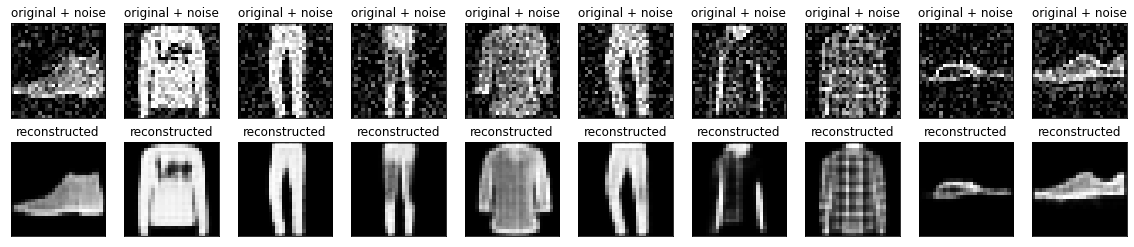

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## 실습 3

### 3. 이상현상 발견 용 오토인코더

이 예제에서는 [ECG 5000 데이터 세트](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000)에서 이상현상을 감지하도록 오토인코더를 훈련시킵니다. 이 데이터에는 각각 140개의 데이터로 구성된 5,000 개의 [심전도(ECG, Electrocardiograms)](https://en.wikipedia.org/wiki/Electrocardiography)가 포함되어 있습니다. 각 예제는 '0'(비정상 리듬에 해당) 또는 '1'(정상 리듬에 해당)으로 레이블이 지정된 단순화 된 버전의 데이터 세트를 사용합니다. 비정상적인 리듬을 식별해볼 것입니다.

- 참고 : 이 예제는 레이블이 지정된 데이터세트이므로 지도학습 문제라고 할 수 있습니다. 이 예제의 목표는 사용 가능한 레이블이 없는 더 큰 데이터 세트에 적용할 수 있는 이상현상 감지 개념을 설명하는 것입니다 (예, 수천 개의 정상 리듬이 있고 비정상 리듬이 적은 경우).

- 오토 인코더를 사용하여 어떻게 이상 현상을 감지합니까? 오토 인코더는 재구성 오류를 최소화하도록 훈련되었습니다. 오토 인코더를 정상적인 리듬으로 만 훈련한 뒤 이를 사용하여 모든 데이터를 재구성합니다. 여기서 우리의 가설은 비정상적인 리듬이 더 높은 재건(reconstruction) 오류를 가질 것이라는 것입니다. 이것을 이용하여 오류가 "임계 값"을 초과하는 경우 리듬을 이상으로 분류하는 것입니다. 

### 데이터 불러오기 : ECG data

데이터를 이용하여 시계열의 데이터를 분류할 것입니다.  [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [ ]:
# 데이터셋을 불러옵니다. 
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

In [ ]:
# 마지막으로 포함된 레이블을 따로 저장합니다.
labels = raw_data[:, -1]

# 데이터에서는 레이블을 제거해줍니다.
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

데이터를`[0,1]`로 정규화 합니다.


In [ ]:
# min-max 알고리즘을 이용하여 정규화합니다. 
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

앞서 설명한 것처럼 모델 학습을 할 때에는 데이터세트 중에서 '1'로 레이블이 지정된 일반(정상) 리듬 만 사용하여 오토인코더를 훈련합니다. 

In [ ]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

ECG의 파장을 한번 플로팅 해보겠습니다.

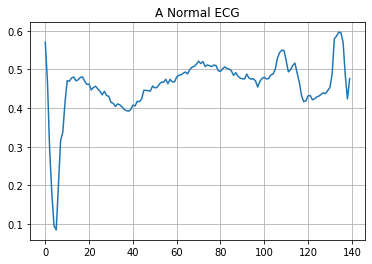

In [ ]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

이상현상이 발생한 ECG 데이터 역시 플로팅해보겠습니다.

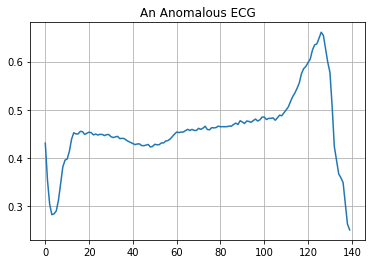

In [ ]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

### 학습 모델 구축

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="sigmoid")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
autoencoder.compile(optimizer='adam', loss='mae')

정상 ECG 만 사용하여 훈련하고, 테스트 용도에서는 정상과 비정상이 섞인 상태를 평가하게 됩니다. 

In [ ]:
history = autoencoder.fit(normal_train_data, normal_train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 0s 21ms/step - loss: 0.0581 - val_loss: 0.0534
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0557 - val_loss: 0.0514
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0526 - val_loss: 0.0498
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0491 - val_loss: 0.0471
Epoch 5/20
5/5 [==============================] - 0s 6ms/step - loss: 0.0454 - val_loss: 0.0453
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0419 - val_loss: 0.0436
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0384 - val_loss: 0.0418
Epoch 8/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0353 - val_loss: 0.0407
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0325 - val_loss: 0.0391
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.0302 - val_loss: 0.0380
Epoch 11/20
5/5 [=====================

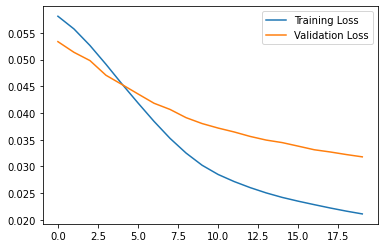

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

재구성 오류가 일반 ECG의 표준 편차 1보다 큰 경우 ECG를 비정상으로 분류하도록 정의합니다.

먼저 학습 세트에서 일반 ECG, 오토 인코더에 의해 인코딩 및 디코딩 된 후의 재구성 및 재구성 오류를 플로팅 해 보겠습니다.

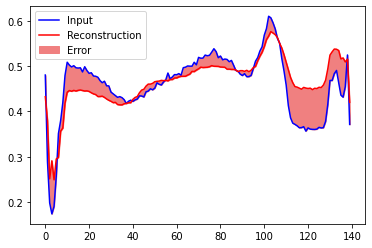

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(normal_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

같은 방식의 이상현상(anomalous) 샘플을 플로팅 해봅니다. 

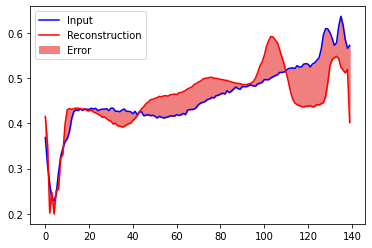

In [ ]:
encoded_imgs = autoencoder.encoder(anomalous_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

plt.plot(anomalous_test_data[0],'b')
plt.plot(decoded_imgs[0],'r')
plt.fill_between(np.arange(140), decoded_imgs[0], anomalous_test_data[0], color='lightcoral' )
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

### 이상현상 탐지해보기

재구성 손실이 고정 임계 값보다 큰지 여부를 계산하여 이상을 감지합니다. 
이 튜토리얼에서는 훈련 세트의 정상 예제에 대한 평균 오차(MAE)를 계산 한 다음 재구성 오차가 훈련 세트의 표준 편차보다 큰 경우 향후 예제를 비정상적인 것으로 분류합니다.

훈련 세트의 정상 ECG에 대한 재구성 오류를 플로팅합니다.

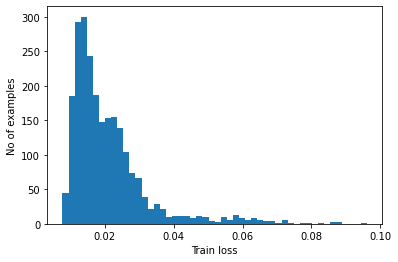

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

평균보다 1SD(1 표준편차만큼)가 높은 임계 값을 선택합니다.

(참고로 통계 수준에서 2SD를 벗어나게 되면, 95%의 신뢰구간을 벗어나는 것을 의미합니다)

In [ ]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.032173388


참고: 이 문제를 해결하는 다른 전략도 분명 있습니다. 

어떤 데이터를 가지고 어떤 문제를 풀것인지에 따라 전략이 바뀔 수 있으니, 이 방법이 절대적으로 옳은 방법은 아닙니다. 

테스트 세트의 비정상적인 예제에 대한 재구성 오류를 검사하면 대부분 임계값보다 재구성 오류가 크다는 것을 알 수 있습니다. 임계값을 바꿈으로써 분류기의 [precision](https://developers.google.com/machine-learning/glossary#precision) 및 [recall](https://developers.google.com/machine-learning/glossary#recall)를 조정할 수 있습니다. 이 방법에 대해서는 지난 이전 섹션들에서 다뤄졌기 때문에 간략히 넘어가도록 하겠습니다. 

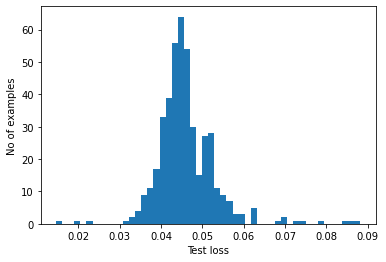

In [ ]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss, bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

재구성 오류가 임계값보다 큰 경우 심전도를 이상 현상으로 분류하도록 설정합니다

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))

In [ ]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.943
Precision = 0.9921722113502935
Recall = 0.9053571428571429


# Review
 - Autoencoder는 encoder와 decoder로 구성되어 있다.
   * Decoder와 Encoder를 구분할 수 있다.
 - 단순한 Dense형태로도 구성할 수 있지만, CNN을 이용한 구성도 가능하다
   * 기본 오토인코더와 Convolution 오토인코더는 어디에서 차이가 날까? 
 - 오토인코더의 용도
   * 노이즈를 제거하는 용도로 사용할 수 있고, 
   * 재구성을 통한 이상값을 찾아내는 데도 사용할 수 있으며, 
   * 특성을 추출하는 용도로서도 사용할 수 있다.



#도전해보기
- 오토인코더를 사용한 이상 감지에 대해 자세히 알아 보려면 Victor Dibia가 TensorFlow.js로 빌드 한이 훌륭한 [대화 형 예제](https://anomagram.fastforwardlabs.com/#/)를 확인하세요. 
- 실제 TensorFlow 사용 사례 : [Airbus가 ISS 원격 측정 데이터에서 이상 징후를 감지](https://blog.tensorflow.org/2020/04/how-airbus-detects-anomalies-iss-telemetry-data- tfx.html)
- 기본 사항에 대해 좀 더 자세히 알아 보려면 François Chollet의 [블로그 게시물](https://blog.keras.io/building-autoencoders-in-keras.html)을 읽어보십시오. 
- 책으로 더 자세히 보고 싶다면, Ian Goodfellow, Yoshua Bengio, Aaron Courville의 [Deep Learning](https://www.deeplearningbook.org/)의 14 장을 참조하세요.